# 📊 **Análise e Tratamento de Dados - Titanic**

## **Descrição**
Análise exploratória de dados do naufrágio do Titanic, desenvolvida como atividade acadêmica da disciplina de **Ciência de Dados**. O objetivo é identificar os principais fatores que influenciaram a sobrevivência dos passageiros através de técnicas de **pré-processamento, análise estatística e visualização de dados**.


## 1. Preparação do Ambiente e Carregamento dos Dados
Carregando o dataset do Titanic e visualizando as primeiras linhas para entender a estrutura dos dados.

In [67]:
# Importação das bibliotecas necessárias
# Pandas para manipular e analisar os dados
# Matplotlib e Seaborn para visualização dos dados
# Numpy para operações matemáticas e numéricas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [68]:
'''Para lidar com a transformação de dados categóricos em númericos,
vou importar o LabelEncoder'''
from sklearn.preprocessing import LabelEncoder

In [69]:
# Carregando o conjunto de dados do arquivo CSV
df = pd.read_csv('/train.csv')

In [70]:
# Exibindo as 5 primeiras linhas
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Análise inicial do dataset
Verificando o tipo de cada coluna, estatísticas básicas e quantidade de valores ausentes.

In [71]:
# Exibindo um resumo das informações do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [72]:
# Exibindo estatísticas descritivas iniciais
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [73]:
# Verificando valores ausentes
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [74]:
print('{:^70}'.format('ANÁLISE DE DADOS AUSENTES'))
print("=" * 70)
print("Total de passageiros no dataset: 891")
print("\nVALORES FALTANDO:")
print(f"- Idade (Age): 177 passageiros sem idade registrada")
print(f"- Cabine (Cabin): 687 passageiros sem cabine registrada")
print(f"- Local de Embarque (Embarked): 2 passageiros sem local registrado")
print("=" * 70)
print("TODOS OS OUTROS DADOS ESTÃO COMPLETOS!")

                      ANÁLISE DE DADOS AUSENTES                       
Total de passageiros no dataset: 891

VALORES FALTANDO:
- Idade (Age): 177 passageiros sem idade registrada
- Cabine (Cabin): 687 passageiros sem cabine registrada
- Local de Embarque (Embarked): 2 passageiros sem local registrado
TODOS OS OUTROS DADOS ESTÃO COMPLETOS!


## 3. Tratamento dos dados
### 3.1 Valores ausentes
Tratando dados ausentes: idade com mediana, embarque com moda, e remoção da cabine por excesso de nulos.

In [75]:
# Tratando os dados ausentes da coluna 'Age'
# Subistituindo os valores ausentes pela mediana
df['Age'] = df['Age'].fillna(df['Age'].median())

# Tratando dados ausentes na coluna 'Embarked'
#Substituindo valores ausentes pela moda
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

'''A coluna 'Cabin' possui muitos valores ausentes, o que pode
dificultar a análise. Vou descartá-la'''
df.drop('Cabin', axis=1, inplace=True)

# Verificando novamente os valores ausentes para confirmar o tratamento
print('{:^50}'.format('VALORES AUSENTES APÓS O TRATAMENTO'))
print("=" * 50)
print(df.isnull().sum())

        VALORES AUSENTES APÓS O TRATAMENTO        
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


### 3.2 Transformar categóricos em numéricos
Convertendo variáveis categóricas (‘Sex’, ‘Embarked’) em numéricas usando LabelEncoder.

In [79]:
# Importando a biblioteca necessária
# Para converter categorias em números
from sklearn.preprocessing import LabelEncoder

# Instanciando o LabelEncoder para Sexo e Embarcação
'''Cria uma instância separada do encoder para a coluna 'Sex,
'Embarked', para que o encoding de uma coluna não afete a outra'''
le_sex = LabelEncoder()
le_embarked = LabelEncoder()

# Aplicando a transformação nas colunas 'Sex'
# Se 'Sex' tem valores ['male', 'female'], vira [1, 0] ou [0, 1]
df['Sex'] = le_sex.fit_transform(df['Sex'])

# Aplicando transformação na coluna 'Embarked'
# Converte os portos de embarque (C, Q, S) em números (0, 1, 2)
df['Embarked'] = le_embarked.fit_transform(df['Embarked'])

# Mostra apenas as colunas transformadas + algumas importantes
print('{:^50}'.format('DataFrame com Dados Transformados'))
print("=" * 50)
print(df[['Sex', 'Embarked', 'Survived', 'Pclass', 'Age']].head())

        DataFrame com Dados Transformados         
   Sex  Embarked  Survived  Pclass   Age
0    1         2         0       3  22.0
1    0         0         1       1  38.0
2    0         2         1       3  26.0
3    0         2         1       1  35.0
4    1         2         0       3  35.0


## 4. Análise descritiva
Explorando medidas de tendência central e variabilidade, além da proporção de sobreviventes.


In [86]:
print('{:^50}'.format('ANÁLISE DESCRITIVA COMPLETA'))
print("=" * 50)

# 1. Estatísticas de todas as colunas numéricas
print('\nESTATÍSTICAS GERAIS')
print(df.describe())
print("=" * 50)

# 2. Proporção de sobreviventes (com percentual)
print("\nSOBREVIVÊNCIA GERAL")
surv_counts = df['Survived'].value_counts()
surv_percent = df['Survived'].value_counts(normalize=True) * 100
print(f"Não sobreviveram: {surv_counts[0]} ({surv_percent[0]:.1f}%)")
print(f"Sobreviveram: {surv_counts[1]} ({surv_percent[1]:.1f}%)")
print("=" * 50)

# 3. Taxa de sobrevivência por gênero
print("\nSOBREVIVÊNCIA POR GÊNERO")
gender_survival = df.groupby('Sex')['Survived'].mean() * 100
print(f"Homens: {gender_survival[1]:.1f}% sobreviveram")
print(f"Mulheres: {gender_survival[0]:.1f}% sobreviveram")
print("=" * 50)

# 4. Taxa de sobrevivência por classe
print("\nSOBREVIVÊNCIA POR CLASSE")
class_survival = df.groupby('Pclass')['Survived'].mean() * 100
for pclass, rate in class_survival.items():
    print(f"Classe {pclass}: {rate:.1f}% sobreviveram")
print("=" * 50)

# 5. Adicionar análise de tarifa paga por sobrevivência
print("\nTARIFA MÉDIA PAGA POR SOBREVIVÊNCIA")
fare_survival = df.groupby('Survived')['Fare'].mean()
print(f"Não-sobreviventes: ${fare_survival[0]:.2f}")
print(f"Sobreviventes: ${fare_survival[1]:.2f}")
print("=" * 50)

# 6. Análise de idade dos sobreviventes vs não-sobreviventes
print("\nIDADE MÉDIA POR SOBREVIVÊNCIA")
age_survival = df.groupby('Survived')['Age'].mean()
print(f"Não-sobreviventes: {age_survival[0]:.1f} anos")
print(f"Sobreviventes: {age_survival[1]:.1f} anos")
print("=" * 50)

           ANÁLISE DESCRITIVA COMPLETA            

ESTATÍSTICAS GERAIS
       PassengerId    Survived      Pclass         Sex         Age  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642    0.647587   29.361582   
std     257.353842    0.486592    0.836071    0.477990   13.019697   
min       1.000000    0.000000    1.000000    0.000000    0.420000   
25%     223.500000    0.000000    2.000000    0.000000   22.000000   
50%     446.000000    0.000000    3.000000    1.000000   28.000000   
75%     668.500000    1.000000    3.000000    1.000000   35.000000   
max     891.000000    1.000000    3.000000    1.000000   80.000000   

            SibSp       Parch        Fare    Embarked  
count  891.000000  891.000000  891.000000  891.000000  
mean     0.523008    0.381594   32.204208    1.536476  
std      1.102743    0.806057   49.693429    0.791503  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000

## 5. Visualização de dados

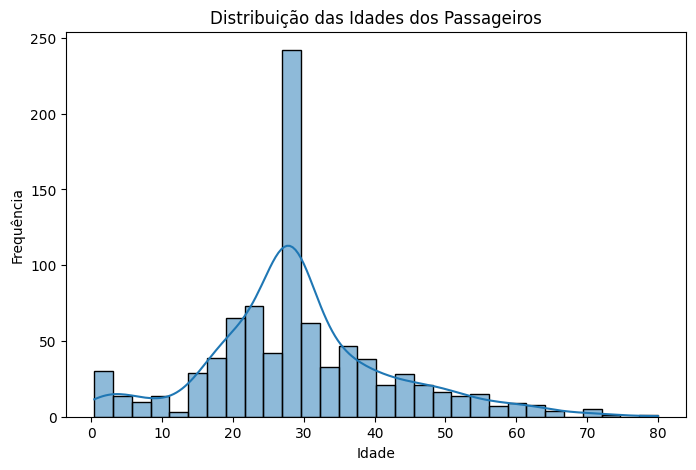

In [95]:
# 1. Histograma - distribuição da idade
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Distribuição das Idades dos Passageiros")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.savefig('histograma_idades.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

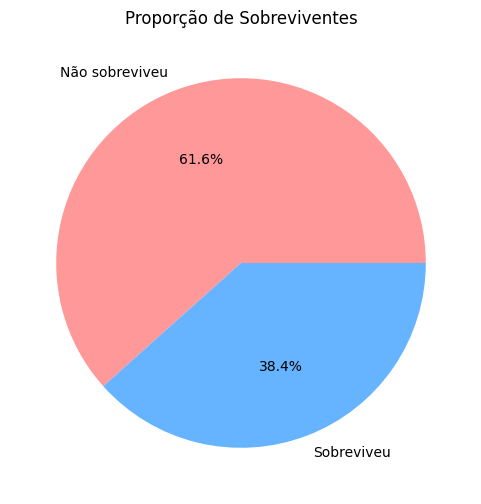

In [96]:
# 2. Gráfico de pizza - proporção de sobreviventes
plt.figure(figsize=(6,6))
df['Survived'].value_counts().plot.pie(
    autopct='%1.1f%%',
    labels=['Não sobreviveu','Sobreviveu'],
    colors=['#ff9999','#66b3ff'])
plt.title("Proporção de Sobreviventes")
plt.ylabel("")
plt.savefig('pizza_sobreviventes.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

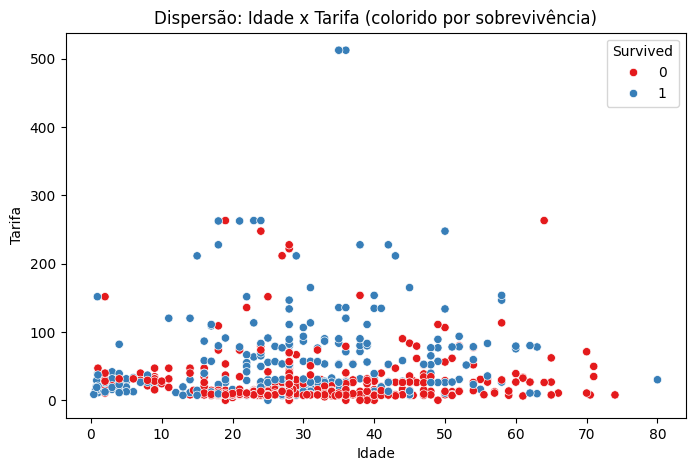

In [97]:
# 3. Gráfico de dispersão - Idade vs Tarifa
plt.figure(figsize=(8,5))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df, palette='Set1')
plt.title("Dispersão: Idade x Tarifa (colorido por sobrevivência)")
plt.xlabel("Idade")
plt.ylabel("Tarifa")
plt.savefig('dispersao_idade_tarifa.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

/tmp/ipython-input-3521543128.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Age', data=df, palette="Set2")


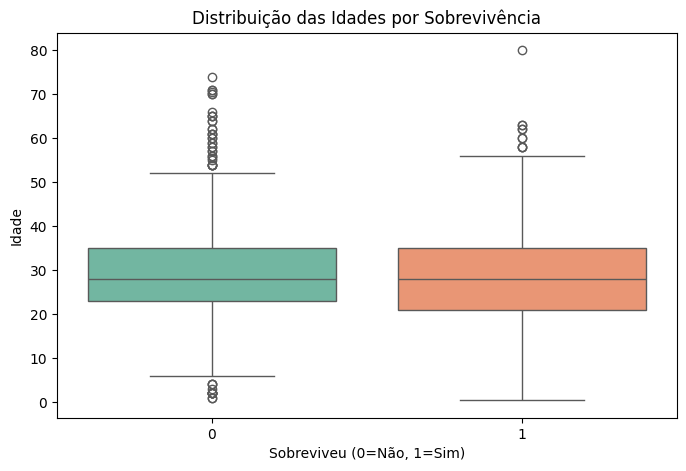

In [98]:
# 4. Gráfico de caixas (boxplot) - idade por sobrevivência
plt.figure(figsize=(8,5))
sns.boxplot(x='Survived', y='Age', data=df, palette="Set2")
plt.title("Distribuição das Idades por Sobrevivência")
plt.xlabel("Sobreviveu (0=Não, 1=Sim)")
plt.ylabel("Idade")
plt.savefig('boxplot_idade_sobrevivencia.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

<Figure size 800x500 with 0 Axes>

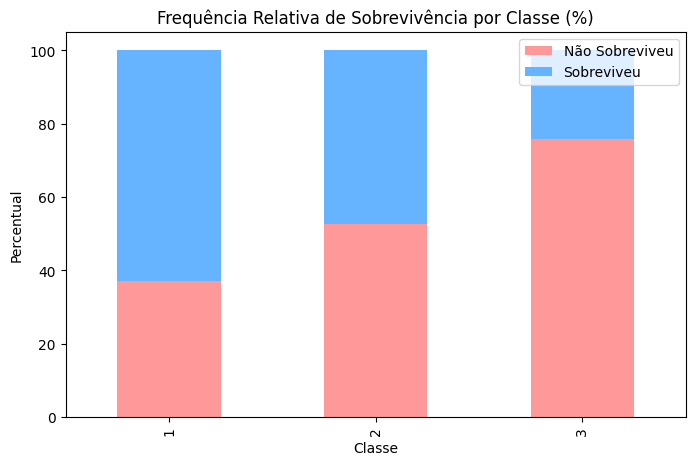

In [99]:
# 5. Frequência relativa (percentual) por classe e sobrevivência
plt.figure(figsize=(8,5))
class_surv = pd.crosstab(df['Pclass'], df['Survived'], normalize='index') * 100
class_surv.plot(kind='bar', stacked=True, figsize=(8,5), color=['#ff9999','#66b3ff'])
plt.title("Frequência Relativa de Sobrevivência por Classe (%)")
plt.xlabel("Classe")
plt.ylabel("Percentual")
plt.legend(["Não Sobreviveu", "Sobreviveu"])
plt.savefig('barras_classe_sobrevivencia.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

In [100]:
# CÉLULA EXTRA PARA BAIXAR TODAS AS IMAGENS
from google.colab import files
import os

print("📥 BAIXANDO TODAS AS IMAGENS...")
print("=" * 40)

imagens = [
    'histograma_idades.png',
    'pizza_sobreviventes.png',
    'dispersao_idade_tarifa.png',
    'boxplot_idade_sobrevivencia.png',
    'barras_classe_sobrevivencia.png'
]

for imagem in imagens:
    if os.path.exists(imagem):
        files.download(imagem)
        print(f' {imagem} - BAIXADA COM SUCESSO!')
    else:
        print(f' {imagem} - NÃO ENCONTRADA')

print("=" * 40)
print("TODAS AS IMAGENS FORAM SALVAS!")

📥 BAIXANDO TODAS AS IMAGENS...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 histograma_idades.png - BAIXADA COM SUCESSO!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 pizza_sobreviventes.png - BAIXADA COM SUCESSO!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 dispersao_idade_tarifa.png - BAIXADA COM SUCESSO!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 boxplot_idade_sobrevivencia.png - BAIXADA COM SUCESSO!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 barras_classe_sobrevivencia.png - BAIXADA COM SUCESSO!
TODAS AS IMAGENS FORAM SALVAS!


## 📊 CONCLUSÃO FINAL - ANÁLISE TITANIC
A análise dos dados revelou padrões claros sobre a sobrevivência no Titanic:

---
**FATOR GÊNERO (mais determinante)**

• Mulheres: 74.2% de sobrevivência → Reflexo da política "mulheres e crianças primeiro"

• Homens: 18.9% de sobrevivência → Evidência do sacrifício masculino

---
**FATOR CLASSE SOCIAL (segundo mais importante)**

• 1ª Classe: 63.0% sobreviveram → Acesso privilegiado aos botes salva-vidas

• 2ª Classe: 47.3% sobreviveram → Situação intermediária

• 3ª Classe: 24.2% sobreviveram → Dificuldade de acesso aos conveses superiores

---
**FATOR ECONÔMICO**

• Sobreviventes pagaram em média $48.40 (mais que o dobro dos $22.12 dos não-sobreviventes)

• Tarifa mais alta estava associada a melhor localização e prioridade no salvamento

---
**FATOR IDADE**

• Sobreviventes: 28.3 anos (idade média mais baixa)

• Não-sobreviventes: 30.0 anos

• Crianças e jovens tiveram leve vantagem no resgate

---

**PRINCIPAIS FATORES DE INFLUÊNCIA (em ordem de importância)**

1- Gênero (sexo feminino → maior taxa de sobrevivência)

2- Classe social (classe alta → maior probabilidade de sobrevivência)

3- Condição econômica (tarifa mais alta → melhores condições de salvamento)

4- Idade (idade mais jovem → leve vantagem)

---

**CONCLUSÃO**

O naufrágio do Titanic revelou profundas desigualdades sociais e o forte impacto de políticas de salvamento baseadas em gênero e classe socioeconômica. Os dados demonstram claramente que mulheres, passageiros de classes superiores e those com maior poder aquisitivo tiveram chances significativamente maiores de sobrevivência.